# Prepare for monomer predictions of predicted dimers, then collect predictions

In [2]:
# %load_ext lab_black
# Python standard library
from glob import glob, iglob
import os
import socket
import sys

# 3rd party library imports
import matplotlib.pyplot as plt
import pandas as pd
import pyrosetta
import numpy as np
import scipy
import seaborn as sns
from tqdm.auto import tqdm  # jupyter compatible progress bar
sys.path.insert(0, '/home/broerman/projects/crispy_shifty/')


tqdm.pandas()  # link tqdm to pandas
# Notebook magic
# save plots in the notebook
%matplotlib inline
# reloads modules automatically before executing cells
%load_ext autoreload
%autoreload 2
print(f"running in directory: {os.getcwd()}")  # where are we?
print(f"running on node: {socket.gethostname()}")  # what node are we on?

running in directory: /mnt/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers
running on node: dig41


#### First look at predictions of MSD designs starting from af2 models ####


In [3]:
scores_df = pd.read_csv(
    '06_alphafold_two_state/05_run_0_af2/af2_complex_prediction_runs_combined.sc',
    sep=' ',
    index_col='description',
    usecols=list(range(1,12)))
scores_df

,pae_binder,pae_interaction,pae_interaction1,pae_interaction2,pae_target,plddt_binder,plddt_target,plddt_total,rmsd,time
description,,,,,,,,,,
05671a075071bdf97a8f3abc363de0cfde4c1d714aa7345d_af2pred,6.766,27.568,27.769,27.367,3.933,85.708,93.225,89.467,10.994,262.109
a4c5de17fe8bc64e3e721dd9eb79142cb528cc1d003889cf_af2pred,3.566,27.070,26.575,27.565,7.712,94.347,87.186,90.767,19.857,60.002
b0b4ff977a28312ce8e0ccf60c7f8a3602ed4942c3f6cdda_af2pred,3.445,26.938,26.530,27.346,5.309,94.820,89.044,91.932,22.117,60.414
709145e5bfc8ed96199b7435a1d1549224f3908fc0e3efdd_af2pred,4.503,26.695,26.691,26.700,5.613,91.466,88.999,90.233,9.073,60.410
dad78054eb39fa06ae9732edb88645e96718be0842842041_af2pred,3.274,26.023,25.669,26.377,5.183,95.009,89.576,92.292,9.733,60.480
...,...,...,...,...,...,...,...,...,...,...
897e95a18e9226758d6613f66137cbca7fe9efde436c9cc1_af2pred,4.443,26.710,26.425,26.995,6.384,89.951,84.440,87.195,11.134,62.578
c98ab6a08462c595d4edf0d052ad2d3f77f99b8108e47842_af2pred,5.679,27.301,27.198,27.405,6.311,85.553,80.963,83.258,12.167,62.521
a03e035f8a173ba9a058e891e165bb4a659cbc14875acfc4_af2pred,4.620,26.952,26.702,27.202,7.152,88.838,84.537,86.688,12.131,62.587


5it [00:00, 16.12it/s]


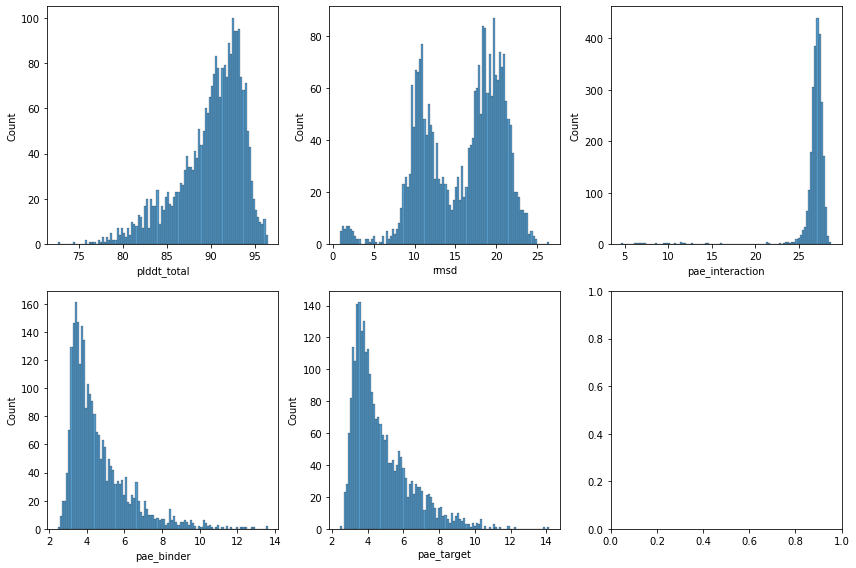

In [3]:
from crispy_shifty.plotting.utils import histplot_df

cols = [
        "plddt_total",
        "rmsd",
        "pae_interaction",
        "pae_binder",
        "pae_target",
    ]

# make sure all the columns to plot are numeric
scores_df[cols] = scores_df[cols].astype(float)
fig, axs = histplot_df(scores_df, cols=cols, bins=100)

# pairplot these as well

In [4]:
def filter_df(df, cutoffs):
    filtered_df = df

    for score_term, cutoff, greaterthan in cutoffs:
        if greaterthan:
            filtered_df = filtered_df[filtered_df[score_term] > cutoff]
        else:
            filtered_df = filtered_df[filtered_df[score_term] < cutoff]

    print(len(filtered_df))
    
    return filtered_df

In [5]:
# Filter designs

cutoffs = [
    ('plddt_total', 85, 1),
    ('rmsd', 3, 0)
]

filtered_df = filter_df(scores_df, cutoffs)
filtered_df

38


,pae_binder,pae_interaction,pae_interaction1,pae_interaction2,pae_target,plddt_binder,plddt_target,plddt_total,rmsd,time
description,,,,,,,,,,
b0e9dac485d8cf307e1434d64fe96907f55876302b69172e_af2pred,10.200,14.553,14.664,14.442,4.159,85.136,88.789,86.962,2.613,60.435
255b7c75ae1263727abdbe122a8ac47d3e65113535ff4624_af2pred,5.291,6.145,6.302,5.987,3.790,90.787,91.557,91.172,2.391,60.425
82df491a907a49b870c73c53ecc2a4ecd5f72f8eddb9974b_af2pred,7.221,9.095,9.536,8.655,3.428,88.572,92.390,90.481,2.047,60.477
39c0332e166843cac72ecb2f44217d844f56497b75f0a9bd_af2pred,6.288,7.939,7.881,7.997,4.396,89.292,88.214,88.753,1.592,60.511
bfccc50914e3d9ebd5e0de6b65109553e5357bf524febdf8_af2pred,4.291,5.259,5.460,5.059,3.369,92.881,93.842,93.362,1.513,60.714
6ba3c7745ef43ab4f809865fc64fd51f1839825483a4dfe5_af2pred,3.808,4.624,4.730,4.519,3.237,93.975,94.259,94.117,1.078,60.510
83f754e768acee18806c02aa6aaaf5eaaab7680b021cd0dd_af2pred,5.690,6.853,7.105,6.601,3.469,90.365,93.032,91.698,1.228,60.404
4897fab63d89915038fb34428d78270b071888829ae19634_af2pred,3.424,5.417,5.494,5.340,3.294,92.026,92.389,92.207,1.162,36.718
679bb1e1668cd3929fc4f05494740280c6c4b608a3748a95_af2pred,7.651,11.859,11.943,11.775,4.894,85.117,87.114,86.116,2.243,36.640


In [6]:
print(f"echo \"{' '.join(filtered_df.index)}\" | silentextractspecific ../af2_predictions.silent")


echo "b0e9dac485d8cf307e1434d64fe96907f55876302b69172e_af2pred 255b7c75ae1263727abdbe122a8ac47d3e65113535ff4624_af2pred 82df491a907a49b870c73c53ecc2a4ecd5f72f8eddb9974b_af2pred 39c0332e166843cac72ecb2f44217d844f56497b75f0a9bd_af2pred bfccc50914e3d9ebd5e0de6b65109553e5357bf524febdf8_af2pred 6ba3c7745ef43ab4f809865fc64fd51f1839825483a4dfe5_af2pred 83f754e768acee18806c02aa6aaaf5eaaab7680b021cd0dd_af2pred 4897fab63d89915038fb34428d78270b071888829ae19634_af2pred 679bb1e1668cd3929fc4f05494740280c6c4b608a3748a95_af2pred 6ccc938857c69a402592c0000bae6678bb224c10d1745f9b_af2pred 410d906b820e268c7f6db704387ea50b6a932d0c7a60fd87_af2pred 696ede2631e5b415e2539229389c1e21f107b788d1995054_af2pred ad581dbe00cfde3d944fb46d258560e4ffe569a0c7740acf_af2pred 813d950afd8c49fe9a2842650a71aaccecd79d482bcff0e8_af2pred be005fd2704bdfd0e46e77a8b69a0bce0fd8d835548505c2_af2pred 50920123b603a1c3c34bce3dfbf981e1127d091d2ec33d7c_af2pred 098e4377d8b772e752597d0da51346210a78be4f72ac4b70_af2pred 8bc1e5e9d55109cf4288916f5

In [7]:
with open('05_two_state/run_0/af2_selected.list', 'r') as f:
    af2_folded = f.read().splitlines()

with open('06_alphafold_two_state/05_run_0_af2/predicted_dimers.list', 'w') as f:
    for tag in sorted(filtered_df.index):
        full_path = list(filter(lambda x: tag[:-8] in x, af2_folded))[0]
        f.write(full_path + '\n')

#### Now look at predictions of MSD designs starting from design models ####


In [8]:
scores_df = pd.read_csv(
    '06_alphafold_two_state/05_run_1_des/af2_complex_prediction_runs_combined.sc',
    sep=' ',
    index_col='description',
    usecols=list(range(1,12)))
scores_df

,pae_binder,pae_interaction,pae_interaction1,pae_interaction2,pae_target,plddt_binder,plddt_target,plddt_total,rmsd,time
description,,,,,,,,,,
2ea25af812800917e6e8842966b7fcce6782bd8aef116e53_af2pred,4.063,27.111,27.216,27.005,3.319,91.258,93.799,92.528,19.397,241.214
ac68b93782680a01b0f2d1d7f696c181d63a57935b8134f0_af2pred,4.036,27.138,27.164,27.112,3.948,92.419,92.190,92.305,10.294,40.899
6de4b46bbcfcbc2c3de0abbaea2e1e6dab6060e4d078363e_af2pred,4.099,27.573,27.509,27.637,4.067,90.389,90.643,90.516,18.768,41.396
d00c1fb5fb0c985cee32629c269f2e158c61148f69cc261c_af2pred,3.751,27.212,27.138,27.286,4.161,91.807,90.313,91.060,18.918,41.545
6ac06d212785879466ae0002cb65db8f6601fb9ea32da2e5_af2pred,4.293,27.461,27.611,27.311,4.094,91.121,91.716,91.418,19.254,41.799
...,...,...,...,...,...,...,...,...,...,...
2b841612dd0e7d5e18f609da15f06fbca3b2df957d83e4c0_af2pred,4.081,27.618,27.266,27.971,8.506,90.754,83.959,87.357,20.209,65.230
b9e0ef779525a5f6887a53c3501cd31e82da4ce35f73bebc_af2pred,4.766,27.638,27.451,27.825,5.059,88.546,87.080,87.813,19.818,65.159
3cce1556147d7a85bc159a3edec9a449987c0d811b72f175_af2pred,4.319,28.001,27.675,28.326,7.859,89.398,80.116,84.757,17.395,65.258


5it [00:00, 11.18it/s]


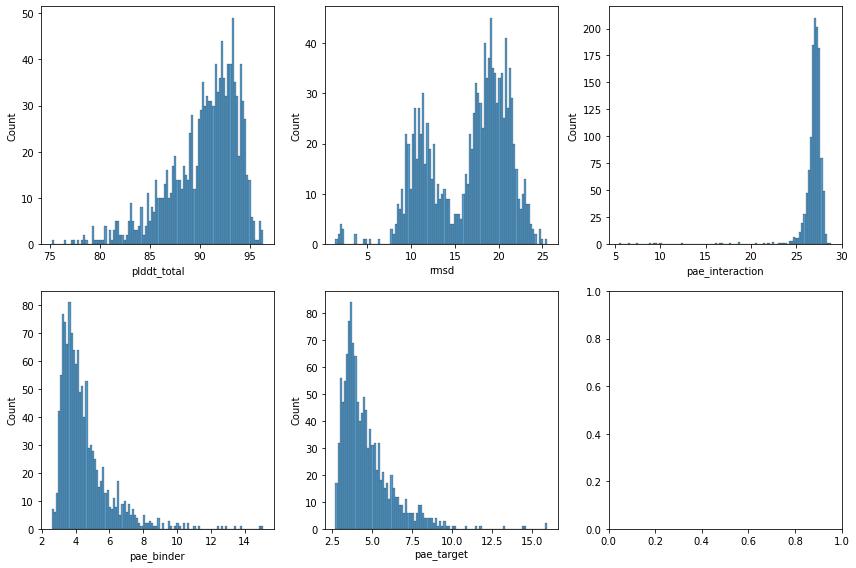

In [9]:
from crispy_shifty.plotting.utils import histplot_df

cols = [
        "plddt_total",
        "rmsd",
        "pae_interaction",
        "pae_binder",
        "pae_target",
    ]

# make sure all the columns to plot are numeric
scores_df[cols] = scores_df[cols].astype(float)
fig, axs = histplot_df(scores_df, cols=cols, bins=100)

# pairplot these as well

In [10]:
# Filter designs

cutoffs = [
    ('plddt_total', 85, 1),
    ('rmsd', 3, 0)
]

filtered_df = filter_df(scores_df, cutoffs)
filtered_df

8


,pae_binder,pae_interaction,pae_interaction1,pae_interaction2,pae_target,plddt_binder,plddt_target,plddt_total,rmsd,time
description,,,,,,,,,,
f5866e4d382f94ce3537a2e7a1ee24e990c691d70a4eaa3a_af2pred,6.146,8.779,8.860,8.699,5.418,86.119,87.137,86.628,2.211,42.406
c9a2774d66cc34eca5ecc9d3332a376fbc6891c2b4eb03e4_af2pred,5.432,10.140,10.126,10.154,6.748,85.648,84.959,85.303,1.972,41.432
cfcd2a0a2bd5d2d67e9833eca65d29a8eed174177e4a007d_af2pred,4.047,6.579,6.450,6.708,4.629,89.195,87.732,88.463,1.782,55.793
f0f2c3e703e31a5cdce75fb689e801a7bf51cc2cff4ec77b_af2pred,6.499,9.460,10.056,8.865,4.491,82.904,88.597,85.751,1.876,37.801
63d96236018d4dc0555b47ccd40136130fade3a860e87c3d_af2pred,4.802,12.442,12.684,12.200,3.510,87.550,89.912,88.731,2.012,70.319
ceb715537161b6c7e90b5790ba13ac36abbf97261fcac9b1_af2pred,7.529,9.222,9.289,9.155,4.510,88.531,89.001,88.766,2.130,62.080
bfee0bbf61516d25858aa572037d81cf90a889f225de2ca5_af2pred,4.341,5.476,5.575,5.377,3.864,92.619,92.483,92.551,1.691,62.290
309484d3e6340812cb4987ed13013da98f316502ee110a98_af2pred,6.441,7.519,7.638,7.400,3.416,90.717,93.248,91.982,1.361,61.874


In [11]:
print(f"echo \"{' '.join(filtered_df.index)}\" | silentextractspecific ../af2_predictions.silent")


echo "f5866e4d382f94ce3537a2e7a1ee24e990c691d70a4eaa3a_af2pred c9a2774d66cc34eca5ecc9d3332a376fbc6891c2b4eb03e4_af2pred cfcd2a0a2bd5d2d67e9833eca65d29a8eed174177e4a007d_af2pred f0f2c3e703e31a5cdce75fb689e801a7bf51cc2cff4ec77b_af2pred 63d96236018d4dc0555b47ccd40136130fade3a860e87c3d_af2pred ceb715537161b6c7e90b5790ba13ac36abbf97261fcac9b1_af2pred bfee0bbf61516d25858aa572037d81cf90a889f225de2ca5_af2pred 309484d3e6340812cb4987ed13013da98f316502ee110a98_af2pred" | silentextractspecific ../af2_predictions.silent


In [13]:
with open('05_two_state/run_1/des_selected.list', 'r') as f:
    af2_folded = f.read().splitlines()

with open('06_alphafold_two_state/05_run_1_des/predicted_dimers.list', 'w') as f:
    for tag in sorted(filtered_df.index):
        full_path = list(filter(lambda x: tag[:-8] in x, af2_folded))[0]
        f.write(full_path + '\n')

In [14]:
design_list = []
dimer_lists = [
    '06_alphafold_two_state/05_run_0_af2/predicted_dimers.list',
    '06_alphafold_two_state/05_run_1_des/predicted_dimers.list'
]
for dimer_list in dimer_lists:
    with open(dimer_list, 'r') as f:
        design_list += [line.rstrip() for line in f]

In [18]:
print(design_list[0])
print(len(design_list))

05_two_state/run_0/0000/098e4377d8b772e752597d0da51346210a78be4f72ac4b70.pdb
46


In [16]:
def add2silent( tag, pose, sfd_out, filename ):

    struct = sfd_out.create_SilentStructOP()
    struct.fill_struct( pose, tag )
    sfd_out.add_structure( struct )
    sfd_out.write_silent_struct( struct, filename )

pyrosetta.distributed.maybe_init(**{
    "options": "-corrections::beta_nov16 true",
    "extra_options":{
        "-out:level": "100"
}})

In [19]:
silent_filename = "06_alphafold_two_state/05_run_01_monomers/dimer-predicted_monomers.silent"
sfd_out = pyrosetta.rosetta.core.io.silent.SilentFileData( silent_filename, False, False, "binary", pyrosetta.rosetta.core.io.silent.SilentFileOptions())

for file in tqdm(design_list):
    full_pose = pyrosetta.pose_from_pdb(file)
    tag = file.split('/')[-1][:-4]
    monomer_A, monomer_B, dimer_A, dimer_B = full_pose.split_by_chain()
    add2silent(tag + '_A', monomer_A, sfd_out, silent_filename)
    add2silent(tag + '_B', monomer_B, sfd_out, silent_filename)

  0%|          | 0/46 [00:00<?, ?it/s]

Run AF2 monomer prediction on the state X monomers of the designs predicted to dimerize.

ran the following commands:

cd ~/projects/crispy_shify/projects/crispy_shifty_dimers/06_alphafold_two_state/05_run_01_monomers

conda activate /home/nrbennet/miniconda3/envs/ampere

/home/nrbennet/software/nates_local_tools/interfaceaf2create -prefix predict_monomers -script /mnt/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/monomerAF2predict.py -silent dimer-predicted_monomers.silent -args " -batch 1" -gres gpu:rtx2080:1 -conda /mnt/home/nrbennet/miniconda3/envs/ampere -structs_per_job 100


collected outputs with:

cat predict_monomers_runs/*/out.silent > af2_predictions.silent

/home/nrbennet/software/bin/fast_merge_scorefiles predict_monomers_runs 

In [6]:
scores_df = pd.read_csv(
    '06_alphafold_two_state/05_run_01_monomers/predict_monomers_runs_combined.sc',
    sep=' ',
    index_col='description',
    usecols=list(range(1,5)))
scores_df

,plddt,rmsd,time
description,,,
1a69783c9aa8d71d8bd9a5c03bc4cc41144c1cbdc7c33be9_A_af2pred,94.630,1.012,227.287
1a69783c9aa8d71d8bd9a5c03bc4cc41144c1cbdc7c33be9_B_af2pred,94.554,1.255,14.741
255b7c75ae1263727abdbe122a8ac47d3e65113535ff4624_A_af2pred,94.129,0.996,14.700
255b7c75ae1263727abdbe122a8ac47d3e65113535ff4624_B_af2pred,93.734,1.357,14.623
39c0332e166843cac72ecb2f44217d844f56497b75f0a9bd_A_af2pred,90.641,4.302,14.723
...,...,...,...
4897fab63d89915038fb34428d78270b071888829ae19634_B_af2pred,89.829,1.009,10.010
679bb1e1668cd3929fc4f05494740280c6c4b608a3748a95_A_af2pred,93.021,0.977,10.073
679bb1e1668cd3929fc4f05494740280c6c4b608a3748a95_B_af2pred,90.355,4.878,10.006


2it [00:00, 10.06it/s]


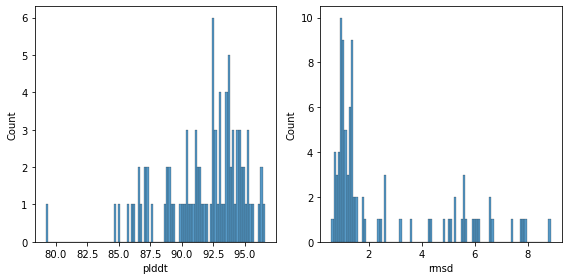

In [7]:
from crispy_shifty.plotting.utils import histplot_df

cols = [
        "plddt",
        "rmsd"
    ]

# make sure all the columns to plot are numeric
scores_df[cols] = scores_df[cols].astype(float)
fig, axs = histplot_df(scores_df, cols=cols, bins=100)

# pairplot these as well

In [8]:
def filter_df(df, cutoffs):
    filtered_df = df

    for score_term, cutoff, greaterthan in cutoffs:
        if greaterthan:
            filtered_df = filtered_df[filtered_df[score_term] > cutoff]
        else:
            filtered_df = filtered_df[filtered_df[score_term] < cutoff]

    print(len(filtered_df))
    
    return filtered_df

def remove_singlets(df):
    only_pairs_df = df
    for index in df.index:
        if '_A_' in index:
            if index.replace('_A_', '_B_', 1) not in df.index:
                only_pairs_df = only_pairs_df.drop(index)
        elif '_B_' in index:
            if index.replace('_B_', '_A_', 1) not in df.index:
                only_pairs_df = only_pairs_df.drop(index)

    print(len(only_pairs_df))

    return only_pairs_df

In [9]:
# Filter designs

cutoffs = [
    ('plddt', 85, 1),
    ('rmsd', 3, 0)
]

filtered_df = filter_df(scores_df, cutoffs)
filtered_df = remove_singlets(filtered_df)
filtered_df

65
42


,plddt,rmsd,time
description,,,
1a69783c9aa8d71d8bd9a5c03bc4cc41144c1cbdc7c33be9_A_af2pred,94.630,1.012,227.287
1a69783c9aa8d71d8bd9a5c03bc4cc41144c1cbdc7c33be9_B_af2pred,94.554,1.255,14.741
255b7c75ae1263727abdbe122a8ac47d3e65113535ff4624_A_af2pred,94.129,0.996,14.700
255b7c75ae1263727abdbe122a8ac47d3e65113535ff4624_B_af2pred,93.734,1.357,14.623
83f754e768acee18806c02aa6aaaf5eaaab7680b021cd0dd_A_af2pred,94.775,1.030,14.711
83f754e768acee18806c02aa6aaaf5eaaab7680b021cd0dd_B_af2pred,92.561,0.723,14.603
8bc1e5e9d55109cf4288916f54748e5292471222971c4195_A_af2pred,94.676,0.969,14.640
8bc1e5e9d55109cf4288916f54748e5292471222971c4195_B_af2pred,96.345,0.687,14.731
9ebf5dcd4ffc1ee1009cba98bb6893c1c3e11f2574b87668_A_af2pred,95.221,0.964,14.621


In [27]:
print(f"echo \"{' '.join(filtered_df.index)}\" | silentextractspecific ../af2_predictions.silent")

echo "1a69783c9aa8d71d8bd9a5c03bc4cc41144c1cbdc7c33be9_A_af2pred 1a69783c9aa8d71d8bd9a5c03bc4cc41144c1cbdc7c33be9_B_af2pred 255b7c75ae1263727abdbe122a8ac47d3e65113535ff4624_A_af2pred 255b7c75ae1263727abdbe122a8ac47d3e65113535ff4624_B_af2pred 83f754e768acee18806c02aa6aaaf5eaaab7680b021cd0dd_A_af2pred 83f754e768acee18806c02aa6aaaf5eaaab7680b021cd0dd_B_af2pred 8bc1e5e9d55109cf4288916f54748e5292471222971c4195_A_af2pred 8bc1e5e9d55109cf4288916f54748e5292471222971c4195_B_af2pred 9ebf5dcd4ffc1ee1009cba98bb6893c1c3e11f2574b87668_A_af2pred 9ebf5dcd4ffc1ee1009cba98bb6893c1c3e11f2574b87668_B_af2pred bfee0bbf61516d25858aa572037d81cf90a889f225de2ca5_A_af2pred bfee0bbf61516d25858aa572037d81cf90a889f225de2ca5_B_af2pred ceb715537161b6c7e90b5790ba13ac36abbf97261fcac9b1_A_af2pred ceb715537161b6c7e90b5790ba13ac36abbf97261fcac9b1_B_af2pred 098e4377d8b772e752597d0da51346210a78be4f72ac4b70_A_af2pred 098e4377d8b772e752597d0da51346210a78be4f72ac4b70_B_af2pred cfcd2a0a2bd5d2d67e9833eca65d29a8eed174177e4a007d_A

### Copy and add scores to the designs which are predicted to dimerize when together and are predicted to fold correctly as monomers ###

In [10]:
# # Load design scores dataframe

# output_files = ['05_two_state/run_0/scores.json',
#                 '05_two_state/run_1/scores.json']

# frames = []
# for output_file in output_files:
#     frames.append(pd.read_json(output_file))

frames = [pd.read_json('05_two_state/run_0/scores.json'),
          pd.read_json('05_two_state/run_1/scores.json')]

# remove the erroneous .bz2
frames[0].rename(index=lambda i: i[:-4], inplace=True)

des_scores_df = pd.concat(frames)

des_scores_df.loc[:, 'msd_input_model'] = np.where(des_scores_df.index.str.contains('run_0'), 'af2', 'rosetta')

# save the paths to the Rosetta multistate design files, but change the dataframe indexing to only contain the uuid for matching with other dataframes later
des_scores_df['design_path'] = des_scores_df.index
des_scores_df.rename(index=lambda i: i.split('/')[-1].split('.')[0], inplace=True)

des_scores_df

,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,...,vbuns_X,vbuns_Y,wnm_all_A_X,wnm_all_A_Y,wnm_all_B_X,wnm_all_B_Y,wnm_hlx_X,wnm_hlx_Y,msd_input_model,design_path
393805355c4b46c8917affa806ffae8710509640cbdf043b,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,3832.687012,54.325855,54.430744,loop_remodel,loop_match,-1.0,319.447357,555.581421,...,0,5,0.227689,0.677451,0.254351,0.461149,0.092366,0.146543,af2,05_two_state/run_0/0004/393805355c4b46c8917aff...
ec273601d795e6517d6418c0e2fbbe2338c6687d9fad0a5f,XBAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAA...,XBAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAA...,150.075790,74.775955,74.775955,loop_match,loop_match,-1.0,571.576660,758.473816,...,0,4,0.401098,0.877094,0.308621,0.550762,0.137486,0.212980,af2,05_two_state/run_0/0004/ec273601d795e6517d6418...
49c5fa528e071bf185292868b8ed020ed7edbd0d3373fe65,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,126.997520,61.185627,61.185627,loop_match,loop_match,-1.0,506.618805,752.389832,...,0,2,0.230769,0.487113,0.240367,0.405601,0.095980,0.152266,af2,05_two_state/run_0/0004/49c5fa528e071bf1852928...
385128086c60116a2667a11ca3ad8ec86e8ea8369b9f42d3,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,124.986877,61.185627,61.185627,loop_match,loop_match,-1.0,543.848694,767.983582,...,0,4,0.183278,0.536907,0.572410,0.638924,0.131289,0.145066,af2,05_two_state/run_0/0004/385128086c60116a2667a1...
35b7931c932e50dfbbdbfcf108ea254a56a3233dce315326,XAAAAAAAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAAA...,1328.937988,59.111366,58.997833,loop_remodel,loop_match,-1.0,653.203064,812.871704,...,0,1,0.317264,0.878735,0.390187,0.623361,0.119002,0.263615,af2,05_two_state/run_0/0004/35b7931c932e50dfbbdbfc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3e0758fd8ce1e93edf9c1f889d76a42b411785894592b780,XAAAAAAAAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAA...,118.126617,58.995125,58.995125,loop_remodel,loop_remodel,-1.0,504.111633,821.365295,...,1,8,0.325567,1.623495,0.342259,0.644122,0.182455,0.245651,rosetta,05_two_state/run_1/decoys/0002/3e0758fd8ce1e93...
028cb7e559e894a0f7d8399beeae0ceb97b4167b9cdbc6c5,XBAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAA...,XBAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAA...,354.687714,74.775955,74.775955,loop_match,loop_match,-1.0,465.294678,800.473999,...,0,2,0.326338,0.864423,0.335971,0.772024,0.131723,0.105849,rosetta,05_two_state/run_1/decoys/0002/028cb7e559e894a...
aa126c9f34cd8199ae61bcca7c66f5001b0f6e5dcb2ce841,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,157.232971,64.283478,64.283478,loop_match,loop_match,-1.0,584.256836,648.372437,...,0,3,0.313695,0.810160,0.309202,0.646933,0.108096,0.153914,rosetta,05_two_state/run_1/decoys/0002/aa126c9f34cd819...
52212cffc6dafac8779fb80c704466c7db1c13b2919fbd84,XAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAABBBAAA...,XAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAABBBAAA...,268.150024,52.911160,53.510536,loop_match,loop_match,-1.0,293.758820,435.267731,...,0,3,0.284217,0.409734,0.311562,0.346377,0.090384,0.133031,rosetta,05_two_state/run_1/decoys/0002/52212cffc6dafac...


In [11]:
# Load dimer prediction dataframe

dimer_pred_files = ['06_alphafold_two_state/05_run_0_af2/af2_complex_prediction_runs_combined.sc',
                    '06_alphafold_two_state/05_run_1_des/af2_complex_prediction_runs_combined.sc']

frames = []
for dimer_pred_file in dimer_pred_files:
    frames.append(
        pd.read_csv(
            dimer_pred_file,
            sep=' ',
            index_col='description',
            usecols=list(range(1,12))
        )
    )
dimer_pred_scores_df = pd.concat(frames)

# Rename/delete some columns to include only those to add to the pdbs later, and rename the index to contain only the uuid for matching with other dataframes later
dimer_pred_scores_df.drop(columns='time', inplace=True)
dimer_pred_scores_df.rename(columns={'plddt_total': 'plddt_dimer', 'rmsd': 'rmsd_dimer', 'pae_binder': 'pae_A', 'pae_target': 'pae_B', 'plddt_binder': 'plddt_dimer_A', 'plddt_target': 'plddt_dimer_B'}, index=lambda i: i.split('_')[0], inplace=True)

dimer_pred_scores_df

,pae_A,pae_interaction,pae_interaction1,pae_interaction2,pae_B,plddt_dimer_A,plddt_dimer_B,plddt_dimer,rmsd_dimer
description,,,,,,,,,
05671a075071bdf97a8f3abc363de0cfde4c1d714aa7345d,6.766,27.568,27.769,27.367,3.933,85.708,93.225,89.467,10.994
a4c5de17fe8bc64e3e721dd9eb79142cb528cc1d003889cf,3.566,27.070,26.575,27.565,7.712,94.347,87.186,90.767,19.857
b0b4ff977a28312ce8e0ccf60c7f8a3602ed4942c3f6cdda,3.445,26.938,26.530,27.346,5.309,94.820,89.044,91.932,22.117
709145e5bfc8ed96199b7435a1d1549224f3908fc0e3efdd,4.503,26.695,26.691,26.700,5.613,91.466,88.999,90.233,9.073
dad78054eb39fa06ae9732edb88645e96718be0842842041,3.274,26.023,25.669,26.377,5.183,95.009,89.576,92.292,9.733
...,...,...,...,...,...,...,...,...,...
2b841612dd0e7d5e18f609da15f06fbca3b2df957d83e4c0,4.081,27.618,27.266,27.971,8.506,90.754,83.959,87.357,20.209
b9e0ef779525a5f6887a53c3501cd31e82da4ce35f73bebc,4.766,27.638,27.451,27.825,5.059,88.546,87.080,87.813,19.818
3cce1556147d7a85bc159a3edec9a449987c0d811b72f175,4.319,28.001,27.675,28.326,7.859,89.398,80.116,84.757,17.395


In [12]:
monomer_pred_scores_df = pd.DataFrame()

for index, row in filtered_df.iterrows():
    if '_A_' in index:
        monomer_str = '_A'
    elif '_B_' in index:
        monomer_str = '_B'
    
    des_uuid = index.split('_')[0]
    monomer_pred_scores_df.loc[des_uuid, 'plddt' + monomer_str] = row['plddt']
    monomer_pred_scores_df.loc[des_uuid, 'rmsd' + monomer_str] = row['rmsd']

monomer_pred_scores_df

,plddt_A,rmsd_A,plddt_B,rmsd_B
1a69783c9aa8d71d8bd9a5c03bc4cc41144c1cbdc7c33be9,94.630,1.012,94.554,1.255
255b7c75ae1263727abdbe122a8ac47d3e65113535ff4624,94.129,0.996,93.734,1.357
83f754e768acee18806c02aa6aaaf5eaaab7680b021cd0dd,94.775,1.030,92.561,0.723
8bc1e5e9d55109cf4288916f54748e5292471222971c4195,94.676,0.969,96.345,0.687
9ebf5dcd4ffc1ee1009cba98bb6893c1c3e11f2574b87668,95.221,0.964,89.343,1.551
bfee0bbf61516d25858aa572037d81cf90a889f225de2ca5,95.593,1.032,93.488,1.086
ceb715537161b6c7e90b5790ba13ac36abbf97261fcac9b1,94.490,0.872,94.874,0.788
098e4377d8b772e752597d0da51346210a78be4f72ac4b70,86.560,2.595,87.070,1.837
cfcd2a0a2bd5d2d67e9833eca65d29a8eed174177e4a007d,88.885,1.164,86.117,1.151
410d906b820e268c7f6db704387ea50b6a932d0c7a60fd87,94.137,1.391,90.341,2.613


In [13]:
# Now add the scores from the dimer predictions and the multistate design

frames = [monomer_pred_scores_df,
          dimer_pred_scores_df.loc[monomer_pred_scores_df.index],
          des_scores_df.loc[monomer_pred_scores_df.index]]

full_scores_df = pd.concat(frames, axis=1)
from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
):
    display(full_scores_df)

,plddt_A,rmsd_A,plddt_B,rmsd_B,pae_A,pae_interaction,pae_interaction1,pae_interaction2,pae_B,plddt_dimer_A,plddt_dimer_B,plddt_dimer,rmsd_dimer,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dssp_A,dssp_B,fa_dun,fa_intra_rep,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,model,new_loop_resis,new_loop_resis_A,new_loop_resis_B,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,remodel_after_loop_A,remodel_before_loop_A,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,shift_A,shift_B,ss_sc,type,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,ala_penalty,buns_X,buns_Y,cms_Y,ddg_Y,dslf_fa13,dslf_fa13_X,dslf_fa13_Y,exposed_hydrophobics_X,exposed_hydrophobics_Y,fa_atr,fa_atr_X,fa_atr_Y,fa_dun_dev,fa_dun_dev_X,fa_dun_dev_Y,fa_dun_rot,fa_dun_rot_X,fa_dun_rot_Y,fa_dun_semi,fa_dun_semi_X,fa_dun_semi_Y,fa_elec,fa_elec_X,fa_elec_Y,fa_intra_atr_xover4,fa_intra_atr_xover4_X,fa_intra_atr_xover4_Y,fa_intra_elec,fa_intra_elec_X,fa_intra_elec_Y,fa_intra_rep_xover4,fa_intra_rep_xover4_X,fa_intra_rep_xover4_Y,fa_intra_sol_xover4,fa_intra_sol_xover4_X,fa_intra_sol_xover4_Y,fa_rep,fa_rep_X,fa_rep_Y,fa_sol,fa_sol_X,fa_sol_Y,geometry_X,geometry_Y,geometry_loop_X,geometry_loop_Y,hbond_bb_sc,hbond_bb_sc_X,hbond_bb_sc_Y,hbond_lr_bb,hbond_lr_bb_X,hbond_lr_bb_Y,hbond_sc,hbond_sc_X,hbond_sc_Y,hbond_sr_bb,hbond_sr_bb_X,hbond_sr_bb_Y,hxl_tors,hxl_tors_X,hxl_tors_Y,ibuns_Y,lk_ball,lk_ball_X,lk_ball_Y,lk_ball_bridge,lk_ball_bridge_X,lk_ball_bridge_Y,lk_ball_bridge_uncpl,lk_ball_bridge_uncpl_X,lk_ball_bridge_uncpl_Y,lk_ball_iso,lk_ball_iso_X,lk_ball_iso_Y,mean_pae,mean_pae_interaction,mean_pae_interaction_AB,mean_pae_interaction_BA,mean_pae_intra_chain,mean_pae_intra_chain_A,mean_pae_intra_chain_B,mean_plddt,met_penalty,mismatch_probability_X,mismatch_probability_Y,np_penalty,omega,omega_X,omega_Y,pTMscore,p_aa_pp,p_aa_pp_X,p_aa_pp_Y,pro_close,pro_close_X,pro_close_Y,rama_prepro,rama_prepro_X,rama_prepro_Y,recycles,ref,ref_X,ref_Y,remodel_after_loop_B,remodel_before_loop_B,rmsd_to_input,sap_A_X,sap_A_Y,sap_B_X,sap_B_Y,sap_X,sap_Y,sasa_Y,sbuns_X,sbuns_Y,sc_X,sc_Y,sc_int_Y,score_per_res_X,score_per_res_Y,tol,total_length_A,total_length_B,total_score,total_score_A_X,total_score_A_Y,total_score_B_X,total_score_B_Y,total_score_X,total_score_Y,vbuns_X,vbuns_Y,wnm_all_A_X,wnm_all_A_Y,wnm_all_B_X,wnm_all_B_Y,wnm_hlx_X,wnm_hlx_Y,msd_input_model,design_path
1a69783c9aa8d71d8bd9a5c03bc4cc41144c1cbdc7c33be9,94.630,1.012,94.554,1.255,6.350,9.320,9.323,9.316,5.778,87.176,86.452,86.814,1.309,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,765.854004,54.325855,54.604378,loop_remodel,loop_match,-1.0,350.579895,567.640381,809.493042,21,55,17,LHHHHHHHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHH...,LHHHHHHHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHH...,813.907307,807.916933,19.241120,8.094554,7.104069,0.752276,0.773637,4.0,"101,102,305,306","101,102","101,102",X26_3_20_2_ct1_fe,204,8.910085,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4,5,4,1.0,2.0,-1.0,0.767119,0.764927,0.739339,-1322.999268,-229.890884,-927.363098,-953.171814,-557.535583,-272.514832,-532.284180,-259.769348,-234.514954,-3.274751,-1,1,0.704857,monomer_ptm,0.197988,0.183607,0.176035,0.184699,1.002799,0.870116,0.098350,0.000000,2,3,2,889.196228,-111.035431,0,0,0,606.300354,187.579132,-5002.068255,-2499.643066,-2502.425293,101.861783,46.096180,55.765602,561.584247,276.513031,285.071228,1108.069548,547.685364,560.384155,-2168.274940,-1122.231323,-1046.043701,-262.681434,-137.809494,-124.871933,-222.221684,-105.898018,-116.323662,189.581277,98.066292,91.514984,234.571082,126.214485,108.356590,936.673178,432.766205,503.906982,4341.734037,2193.007568,2148.726562,0,2,0,2,-44.770807,-18.850996,-25.919811,-37.415157,-20

In [14]:
full_scores_df['Y-X'] = full_scores_df['total_score_Y'] - full_scores_df['total_score_X']
full_scores_df['A_Y-X'] = full_scores_df['total_score_A_Y'] - full_scores_df['total_score_A_X']
full_scores_df['B_Y-X'] = full_scores_df['total_score_B_Y'] - full_scores_df['total_score_B_X']

43it [00:01, 42.35it/s]


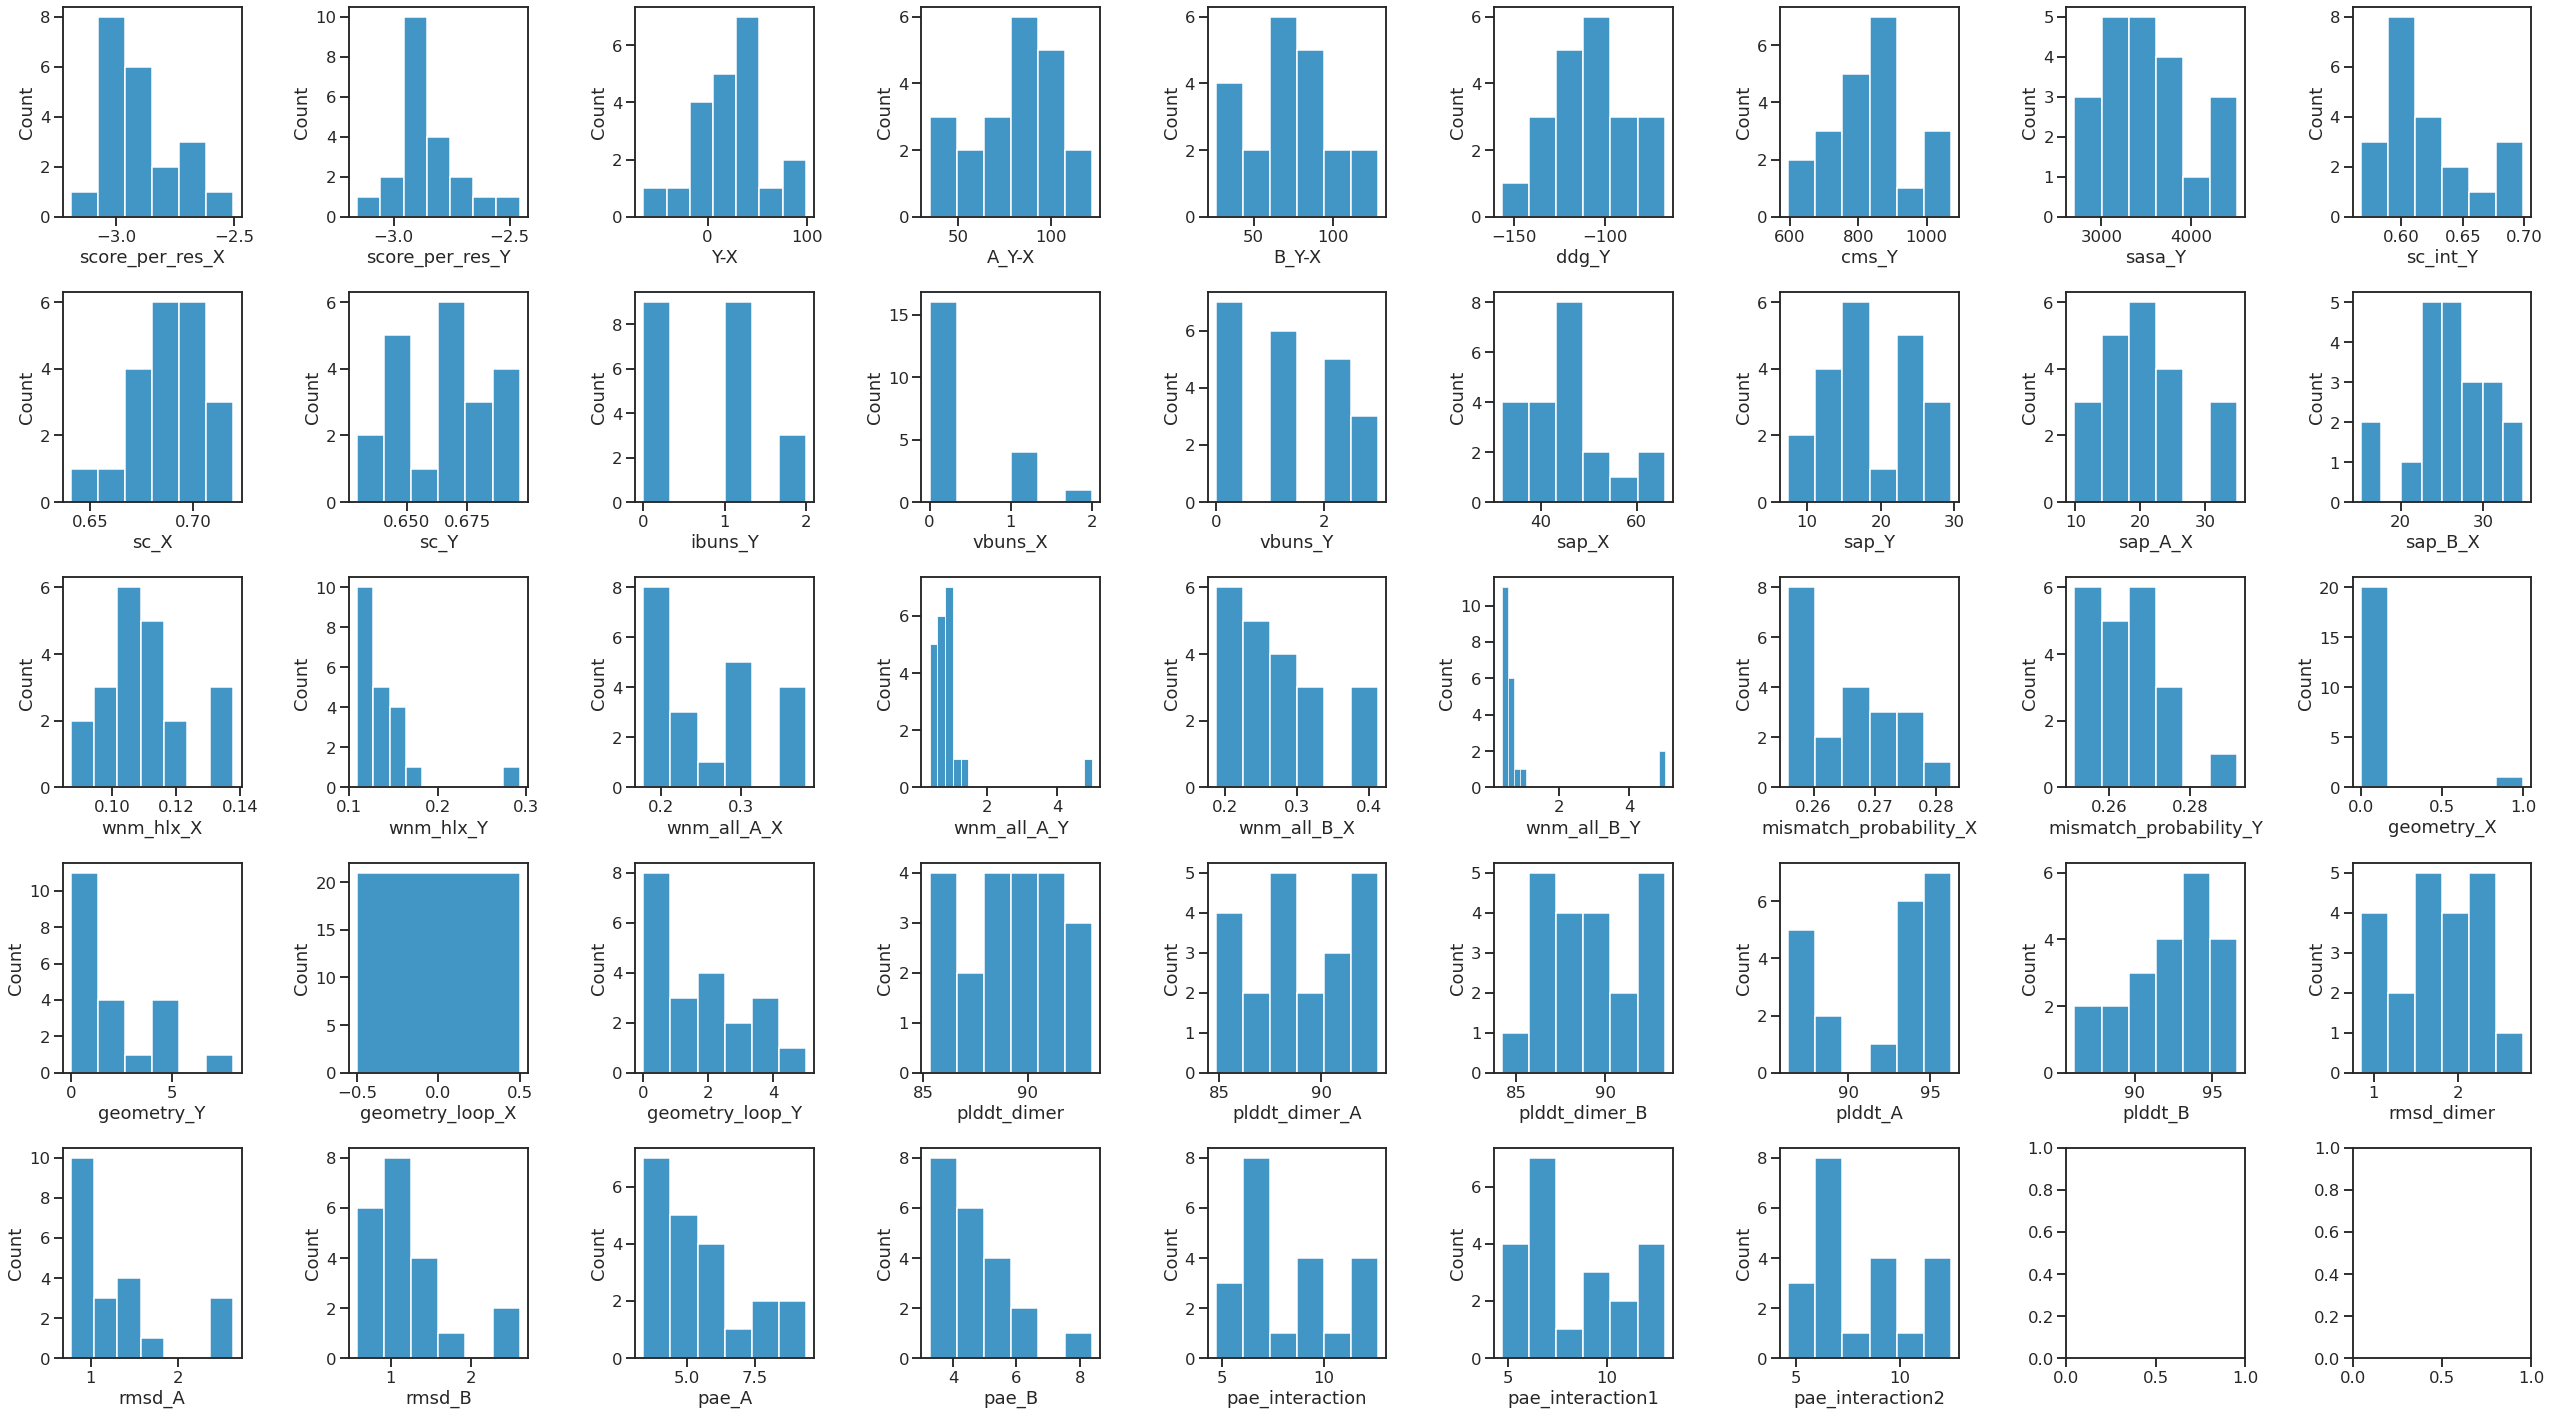

In [15]:
from crispy_shifty.plotting.utils import histplot_df

sns.set(
    context="talk",
    font_scale=1,  # make the font larger; default is pretty small
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

cols = [
        "score_per_res_X",
        "score_per_res_Y",
        "Y-X",
        "A_Y-X",
        "B_Y-X",
        "ddg_Y",
        "cms_Y",
        "sasa_Y",
        "sc_int_Y",
        "sc_X",
        "sc_Y",
        "ibuns_Y",
        "vbuns_X",
        "vbuns_Y",
        "sap_X",
        "sap_Y",
        "sap_A_X",
        "sap_B_X",
        "wnm_hlx_X",
        "wnm_hlx_Y",
        "wnm_all_A_X",
        "wnm_all_A_Y",
        "wnm_all_B_X",
        "wnm_all_B_Y",
        "mismatch_probability_X",
        "mismatch_probability_Y",
        "geometry_X",
        "geometry_Y",
        "geometry_loop_X",
        "geometry_loop_Y",
        'plddt_dimer',
        'plddt_dimer_A',
        'plddt_dimer_B',
        'plddt_A',
        'plddt_B',
        'rmsd_dimer',
        'rmsd_A',
        'rmsd_B',
        'pae_A',
        'pae_B',
        'pae_interaction',
        'pae_interaction1',
        'pae_interaction2',
    #     "parent",
    ]

# make sure all the columns to plot are numeric
full_scores_df[cols] = full_scores_df[cols].astype(float)
fig, axs = histplot_df(full_scores_df, cols=cols, save_path='06_alphafold_two_state/predicted_designs_01/predicted_dimer_metrics.png')

# pairplot these as well

In [27]:
full_scores_df.to_json('06_alphafold_two_state/predicted_designs_01/full_scores_df.json')

In [2]:
# Use bb_clash to match design models to their parent one-state design

import pyrosetta.distributed.cluster as cluster

bb_clash_list = []
with open('04_alphafold_one_state/selected.list', 'r') as f:
    for sample_design_path in f:
        sample_design_path = sample_design_path.rstrip()
        bb_clash = float(cluster.get_scores_dict(sample_design_path)["scores"]['bb_clash'])
        bb_clash_list.append((sample_design_path, bb_clash, 'af2'))
with open('04_alphafold_one_state/selected_design.list', 'r') as f:
    for sample_design_path in f:
        sample_design_path = sample_design_path.rstrip()
        bb_clash = float(cluster.get_scores_dict(sample_design_path)["scores"]['bb_clash'])
        bb_clash_list.append((sample_design_path, bb_clash, 'des'))

def get_pdb_path(bb_clash, model_str, bb_clash_list):
    for pdb_path, bb_clash_val, model_str_val in bb_clash_list:
        if abs(bb_clash_val - bb_clash) < 0.1 and model_str_val == model_str:
            return pdb_path
    print('No match found for bb_clash:', bb_clash, 'model_str:', model_str)

In [30]:
# Copy selected designs and write PyRosettaCluster-like metadata

import collections
import json
import os

for index, row in full_scores_df.iterrows():

    scores = row.to_dict()

    design_path = row.pop('design_path')
    split_design_path = design_path.split('/')
    run_str = split_design_path[1]
    if run_str =='run_0':
        output_path = "05_two_state"
        decoy_dir = run_str
    else:
        output_path = "05_two_state/run_1"
        decoy_dir = split_design_path[2]
    if scores['msd_input_model'] == 'af2':
        model_str = 'af2'
    else:
        model_str = 'des'

    # Copy the design models with metadata

    pdb_path = get_pdb_path(scores['bb_clash'], model_str, bb_clash_list)

    pdbfile_data = json.dumps(
        {
            "instance": {"compressed": False,
                         "decoy_dir_name": decoy_dir,
                         "environment": "",
                         "output_path": output_path,
                         "simulation_name": "05_two_state_" + run_str,
                         "simulation_records_in_scorefile": False,
                         "tasks": {"pdb_path": pdb_path,
                                   "ala_pen": 2,
                                   "met_pen": 1,
                                   "np_pen": 3},
                        },
            "metadata": {"decoy_name": index, "output_file": design_path},
            "scores": collections.OrderedDict(sorted(scores.items())),
        }
    )

    with open(design_path, 'r') as f:
        pdbstring = f.read()

    # Write full .pdb record
    pdbstring_data = pdbstring + os.linesep + "REMARK PyRosettaCluster: " + pdbfile_data
    output_file = '/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_01/design_models/'  + row['parent'] + '_' + index + '.pdb'
    with open(output_file, "w") as f:
        f.write(pdbstring_data)

    # Copy the AF2 models with metadata

    output_dir = '/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_01'

    af_dimer_pdb_path = '06_alphafold_two_state/05_' + run_str + '_' + model_str + '/predicted_dimers/' + index + '_af2pred.pdb'
    af_monomer_a_pdb_path = '06_alphafold_two_state/05_run_01_monomers/predicted_dimers_and_monomers/' + index + '_A_af2pred.pdb'
    af_monomer_b_pdb_path = '06_alphafold_two_state/05_run_01_monomers/predicted_dimers_and_monomers/' + index + '_B_af2pred.pdb'

    for combo, path in zip(['dimer', 'monomer_A', 'monomer_B'], [af_dimer_pdb_path, af_monomer_a_pdb_path, af_monomer_b_pdb_path]):

        output_file = output_dir + '/af2_models/' + row['parent'] + '_' + index + '_' + combo + '.pdb'

        pdbfile_data = json.dumps(
            {
                "instance": {"compressed": False,
                            "decoy_dir_name": "af2_models",
                            "environment": "",
                            "output_path": output_dir,
                            "simulation_name": "06_alphafold_two_state",
                            "simulation_records_in_scorefile": False,
                            "tasks": {"pdb_path": design_path,
                                    "af_dimer_pdb_path": af_dimer_pdb_path,
                                    "af_monomer_A_pdb_path": af_monomer_a_pdb_path,
                                    "af_monomer_B_pdb_path": af_monomer_b_pdb_path},
                            },
                "metadata": {"decoy_name": index, "output_file": output_file},
                "scores": collections.OrderedDict(sorted(scores.items())),
            }
        )

        with open(path, 'r') as f:
            pdbstring = f.read()

        # Write full .pdb record
        pdbstring_data = pdbstring + os.linesep + "REMARK PyRosettaCluster: " + pdbfile_data
        with open(output_file, "w") as f:
            f.write(pdbstring_data)

    # Write the score file
        
    scorefile_data = json.dumps(
        {
            output_file: collections.OrderedDict(
                sorted(scores.items())
            ),
        }
    )
    # Write data to new scorefile
    with open('/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/06_alphafold_two_state/predicted_designs_01/scores.json', "a") as f:
        f.write(scorefile_data + '\n')

In [36]:
# Are most of these coming from the same or a few inputs to two-state design? Or does it widely sample the input set?
# Answer: No this time! However, most inputs have only one design present in the output set. Since I only sampled nstruct 5
# on all designs, this suggests I should sample more two-state designs.

for index, row in full_scores_df.iterrows():

    scores = row.to_dict()

    if scores['msd_input_model'] == 'af2':
        model_str = 'af2'
    else:
        model_str = 'des'

    pdb_path = get_pdb_path(scores['bb_clash'], model_str, bb_clash_list)

    print('/'.join(pdb_path.split('/')[7:]))

04_alphafold_one_state/decoys/0001/04_alphafold_one_state_5881b1d5f12d42d089a20a77c3799d41.pdb.bz2
04_alphafold_one_state/decoys/0001/04_alphafold_one_state_5881b1d5f12d42d089a20a77c3799d41.pdb.bz2
04_alphafold_one_state/decoys/0000/04_alphafold_one_state_bc3237d8c36a4c19909c90e70b122ccd.pdb.bz2
04_alphafold_one_state/decoys/0001/04_alphafold_one_state_63e6c0cb6c8d4658bac654335568b3eb.pdb.bz2
04_alphafold_one_state/decoys/0001/04_alphafold_one_state_5881b1d5f12d42d089a20a77c3799d41.pdb.bz2
03_close_loops/decoys/0003/03_close_loops_9c4be376cbbb4dd3a92e6b5cecdb3315.pdb.bz2
03_close_loops/decoys/0001/03_close_loops_4bbe1093fe8c47e595b45c4441de4bac.pdb.bz2
04_alphafold_one_state/decoys/0001/04_alphafold_one_state_ae4b6039a49a4f1e8c59994bf6f5d5e5.pdb.bz2
03_close_loops/decoys/0002/03_close_loops_2d4636252b78437ebc72e138aad91aac.pdb.bz2
04_alphafold_one_state/decoys/0001/04_alphafold_one_state_b68f5115e7ab4df5b0fbb88113a42c38.pdb.bz2
04_alphafold_one_state/decoys/0001/04_alphafold_one_state_

In [5]:
get_pdb_path(273.3066711425781, 'af2', bb_clash_list)

'/home/broerman/projects/crispy_shifty/projects/crispy_shifty_dimers/04_alphafold_one_state/decoys/0000/04_alphafold_one_state_20573e1cd20d4bda9e35df01bbcf964f.pdb.bz2'